## Title: Predicting Air Quality Index (AQI) Using Machine Learning

## Problem Statemment
Air pollution is a major environmental and public health concern, affecting millions of people worldwide. Accurate AQI prediction can help reduce health risks, improve urban planning, and assist policymakers in implementing pollution control measures. The objective of this project is to develop a machine learning model that predicts AQI based on meteorological and pollutant data, enabling proactive decision-making.

Goal: the main goal of this project is to develop a machine learning model that can accurately predict the Air Quality Index (AQI) based on various meteorological and pollutant data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv("/content/city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


## About The Data


Data Content:

The dataset seems to contain information about air quality in various cities over time. Here are the key columns:

* City: The name of the city where the measurements were taken.
* Date: The date of the measurements.
* PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene: These columns represent the concentrations of various air pollutants.
* AQI: This is likely the Air Quality Index, a measure of how polluted the air is.
* AQI_Bucket: This column categorizes the AQI into different levels (e.g., Good, Moderate, Poor).

Data Exploration and Preprocessing:

* Handling missing values: Missing values in the dataset are filled using either the mean or the median of the respective columns.
* Data visualization: Several visualizations are created to understand the distribution of the data, including histograms, box plots, and heatmaps.
* Encoding categorical features: The 'City' and 'AQI_Bucket' columns are converted to numerical representations using label encoding.
* Scaling numerical features: Numerical features are scaled using MinMaxScaler to bring them to a similar range.


##**UNDERSTAND THE DATA**

In [ ]:
print(df.head(15))

         City        Date  PM2.5  PM10      NO    NO2     NOx  NH3      CO  \
0   Ahmedabad  2015-01-01    NaN   NaN    0.92  18.22   17.15  NaN    0.92   
1   Ahmedabad  2015-01-02    NaN   NaN    0.97  15.69   16.46  NaN    0.97   
2   Ahmedabad  2015-01-03    NaN   NaN   17.40  19.30   29.70  NaN   17.40   
3   Ahmedabad  2015-01-04    NaN   NaN    1.70  18.48   17.97  NaN    1.70   
4   Ahmedabad  2015-01-05    NaN   NaN   22.10  21.42   37.76  NaN   22.10   
5   Ahmedabad  2015-01-06    NaN   NaN   45.41  38.48   81.50  NaN   45.41   
6   Ahmedabad  2015-01-07    NaN   NaN  112.16  40.62  130.77  NaN  112.16   
7   Ahmedabad  2015-01-08    NaN   NaN   80.87  36.74   96.75  NaN   80.87   
8   Ahmedabad  2015-01-09    NaN   NaN   29.16  31.00   48.00  NaN   29.16   
9   Ahmedabad  2015-01-10    NaN   NaN     NaN   7.04    0.00  NaN     NaN   
10  Ahmedabad  2015-01-11    NaN   NaN  132.07  55.80   24.53  NaN  132.07   
11  Ahmedabad  2015-01-12    NaN   NaN   52.04  40.67   90.24  N

In [ ]:
df.shape

(29531, 16)

In [ ]:
df.sample()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
27519,Thiruvananthapuram,2018-12-30,52.29,83.14,2.66,6.65,5.68,5.1,5.48,13.9,70.07,NaN,NaN,NaN,160.0,Moderate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


INFERENCES:This section loads the dataset from the CSV file, displays its initial rows, checks its dimensions (shape), shows a random sample, and provides information about data types and missing values.

##**Data Visualization and Missing Value Handling**

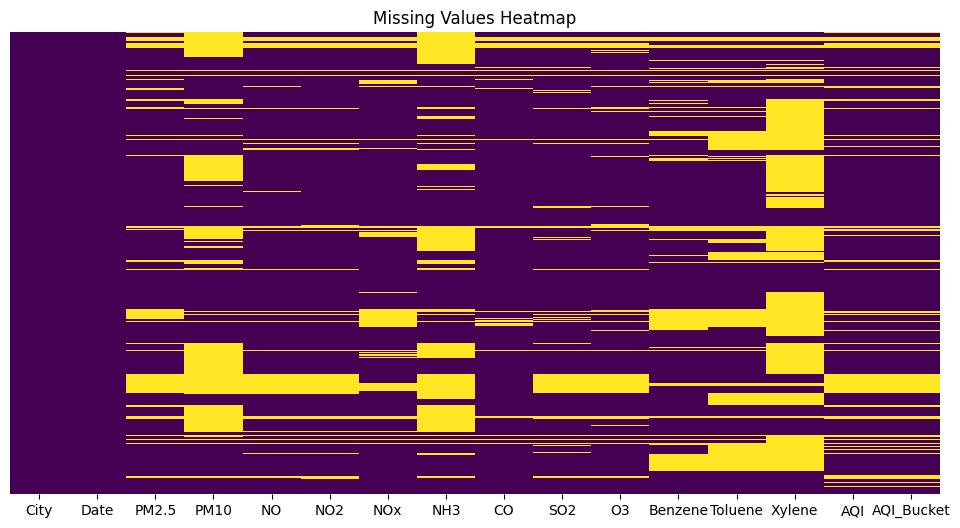

In [ ]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Missing values heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# Box plots for outlier detection
df.select_dtypes(include=['float64']).boxplot(figsize=(15, 8), rot=90)
plt.title("Box Plot of Numerical Features")
plt.show()

# Histograms for numerical features
df.select_dtypes(include=['float64']).hist(figsize=(15, 10), bins=30, edgecolor="black")
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
df.isnull().sum()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["PM2.5"], bins=30, kde=True)
plt.title("Distribution of PM2.5")
plt.show()

In [ ]:
df["PM2.5"].fillna(df["PM2.5"].median(), inplace=True)

<Figure size 1500x1000 with 0 Axes>

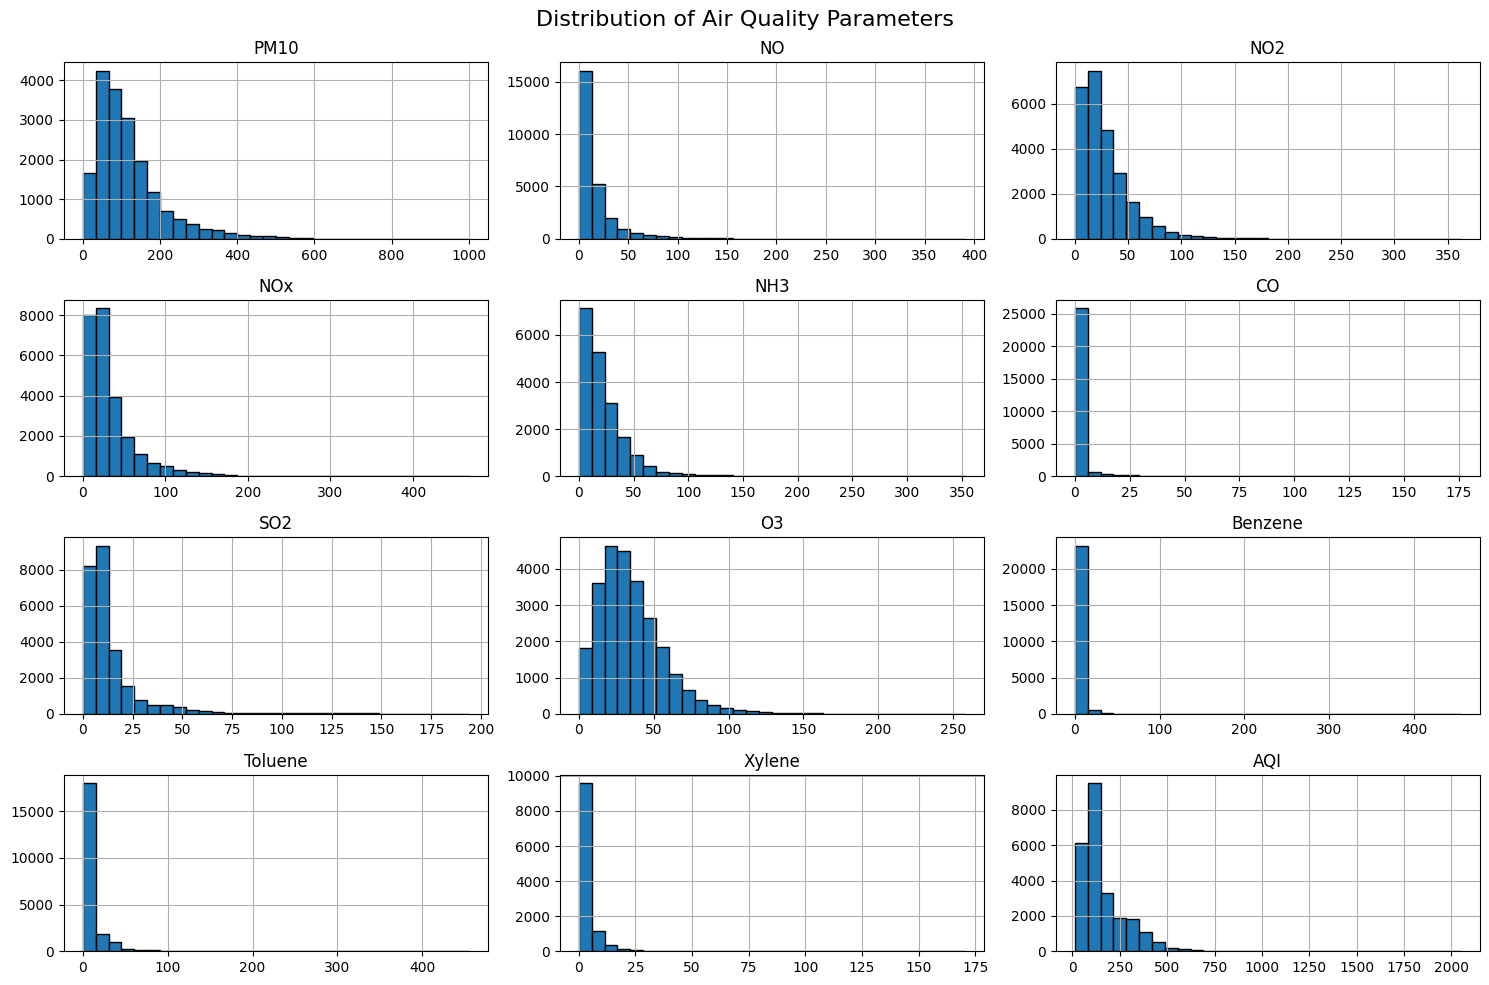

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_check = ["PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3",
                 "Benzene", "Toluene", "Xylene", "AQI"]

plt.figure(figsize=(15, 10))
df[cols_to_check].hist(bins=30, edgecolor="black", figsize=(15,10))
plt.suptitle("Distribution of Air Quality Parameters", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
for col in cols_to_check:
    if df[col].skew() < 1:  # Less skewed, use mean
        df[col].fillna(df[col].mean(), inplace=True)
    else:  # Highly skewed, use median
        df[col].fillna(df[col].median(), inplace=True)


<ipython-input-13-6cf61cb0fd3b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
df["AQI_Bucket"].fillna(df["AQI_Bucket"].mode()[0], inplace=True)

<ipython-input-14-6dc9208a4f0e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["AQI_Bucket"].fillna(df["AQI_Bucket"].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


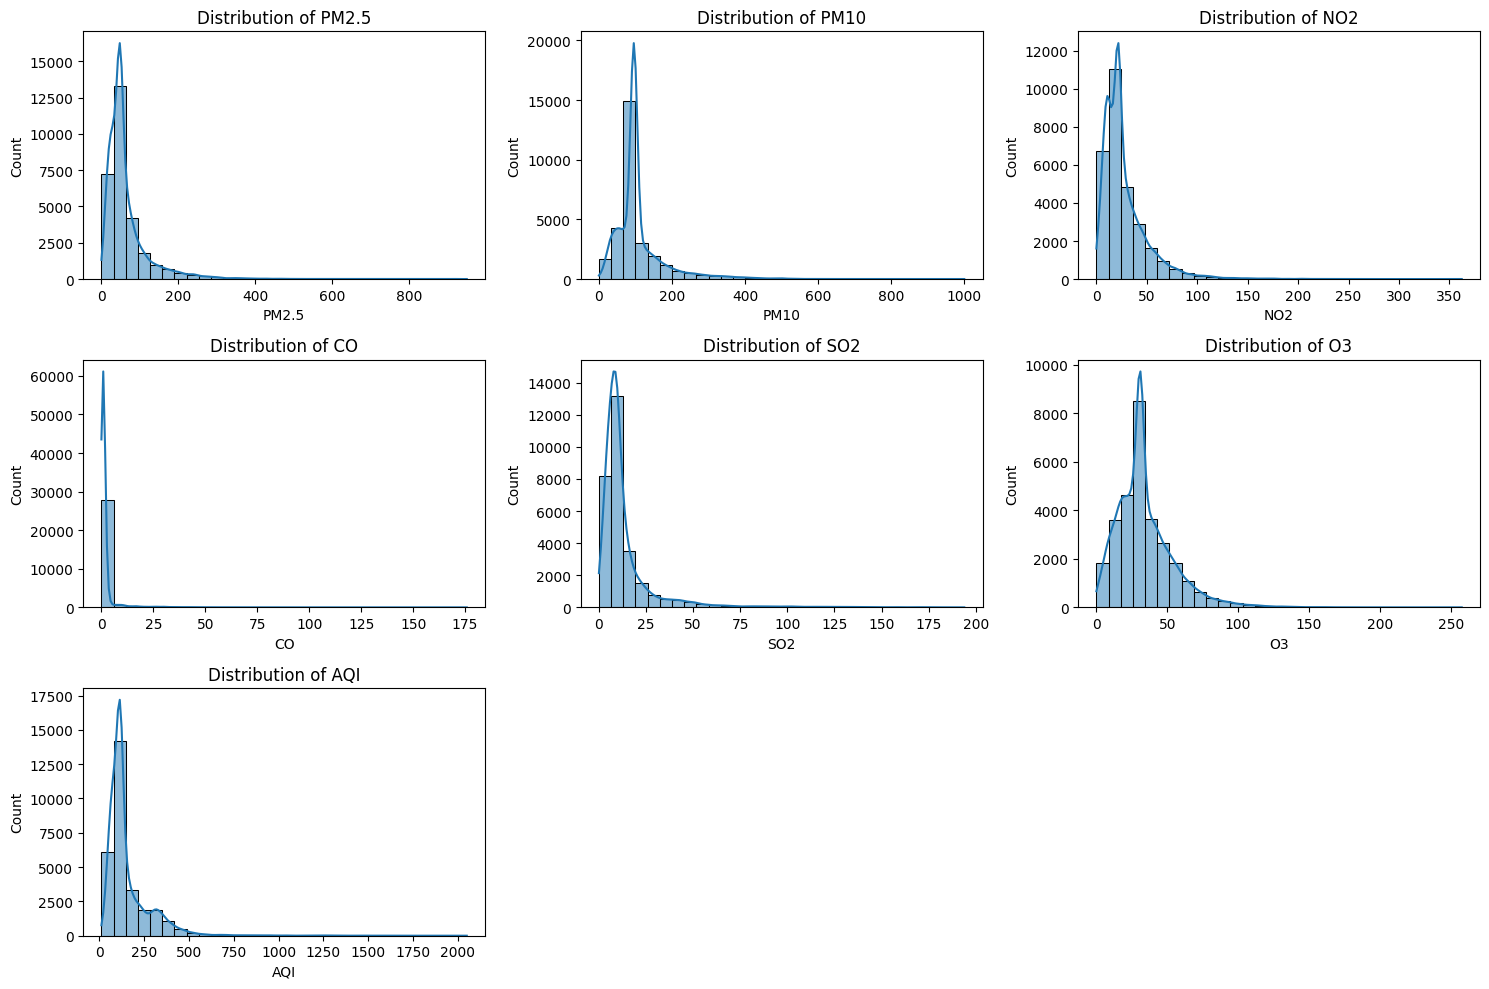

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["PM2.5", "PM10", "NO2", "CO", "SO2", "O3", "AQI"]
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


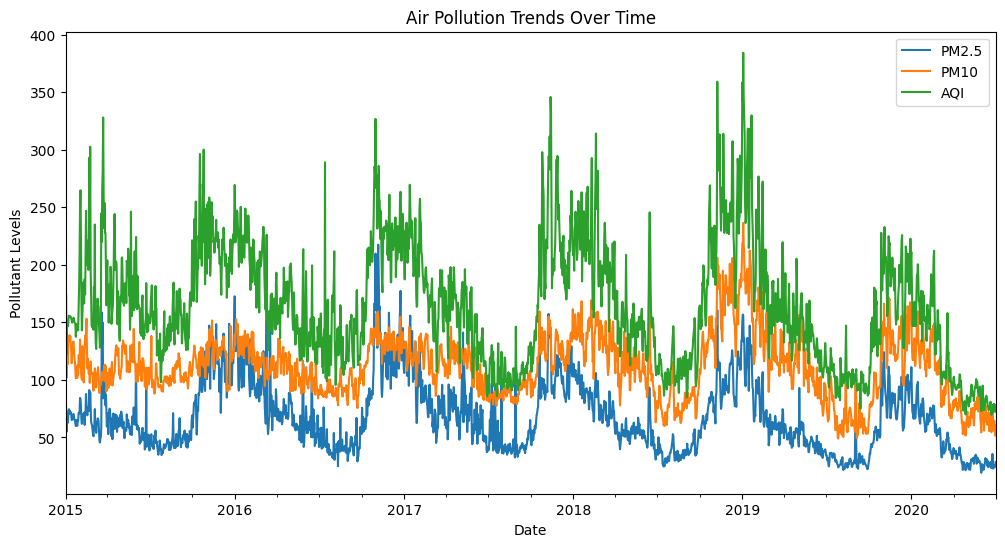

In [ ]:
df.groupby("Date")[["PM2.5", "PM10", "AQI"]].mean().plot(figsize=(12,6))
plt.title("Air Pollution Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Pollutant Levels")
plt.show()


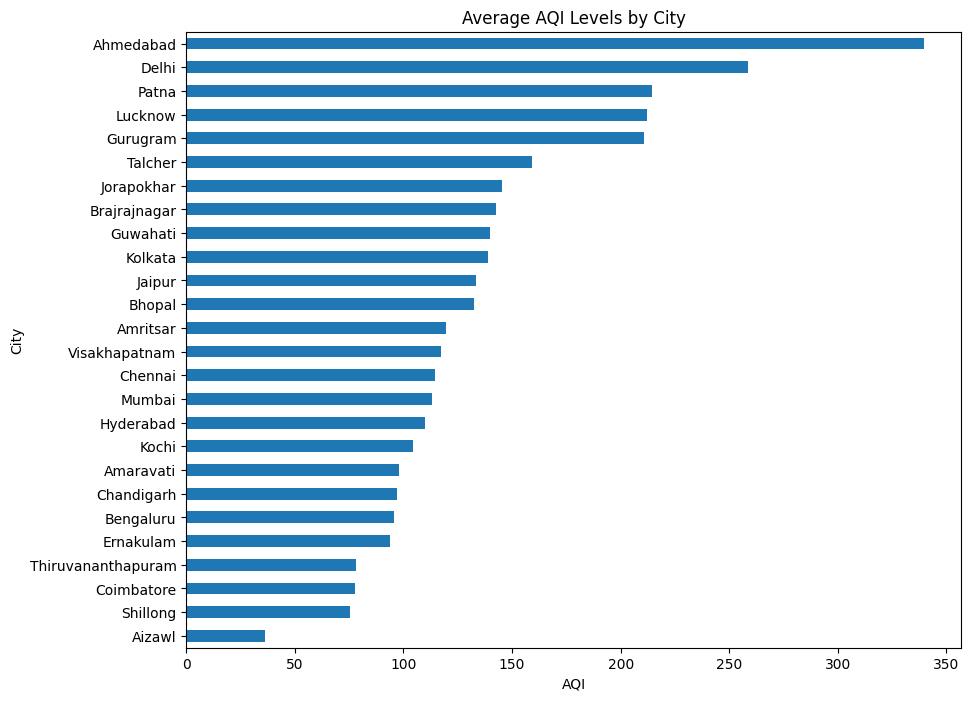

In [ ]:
df.groupby("City")["AQI"].mean().sort_values().plot(kind="barh", figsize=(10, 8))
plt.title("Average AQI Levels by City")
plt.xlabel("AQI")
plt.ylabel("City")
plt.show()


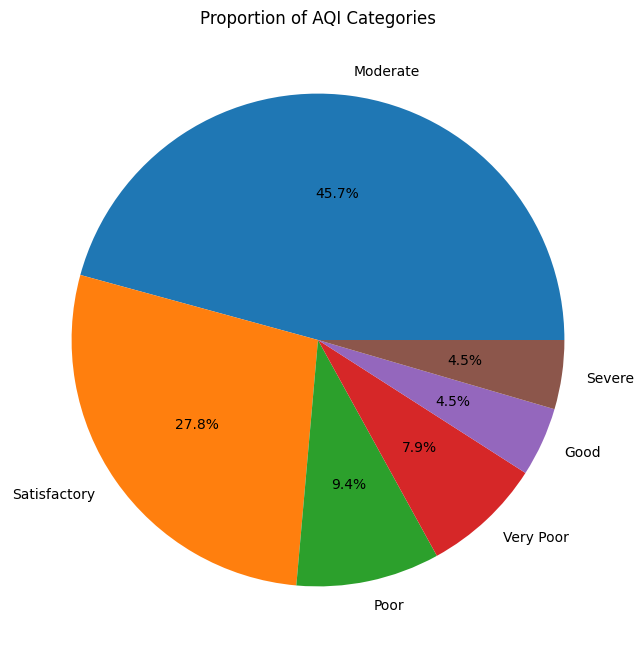

In [ ]:
df["AQI_Bucket"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8))
plt.title("Proportion of AQI Categories")
plt.ylabel("")
plt.show()


In [ ]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


INFERENCES: This part focuses on visualizing the data distribution using various plots (histograms, box plots, heatmaps) to identify patterns, outliers, and missing values. It then imputes missing values using appropriate strategies (mean or median) based on the distribution of each feature.

## **Feature Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["City_Num"] = le.fit_transform(df["City"])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["AQI_bucket"] = le.fit_transform(df["AQI_Bucket"])

In [ ]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,City_Num,AQI_bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate,0,1
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate,0,1
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate,0,1
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate,0,1
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,25,0
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,25,3
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,25,3
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,25,3


In [ ]:
df.drop(["City"], axis=1, inplace=True)

In [ ]:
df.drop(["AQI_Bucket"], axis=1, inplace=True)

In [ ]:
df

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,City_Num,AQI_bucket
0,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,0,1
1,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,0,1
2,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,0,1
3,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,0,1
4,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,25,0
29527,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,25,3
29528,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,25,3
29529,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,25,3


Inference: This section deals with converting categorical features ('City' and 'AQI_Bucket') into numerical representations using label encoding. This is often necessary for machine learning algorithms that work with numerical data.

## **Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3",
                  "Benzene", "Toluene", "Xylene", "AQI"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


Inference: Here, numerical features are scaled using MinMaxScaler to bring them to a similar range (between 0 and 1). This helps prevent features with larger values from dominating the model and improves the performance of algorithms sensitive to feature scales.

## **Correlation Analysis**

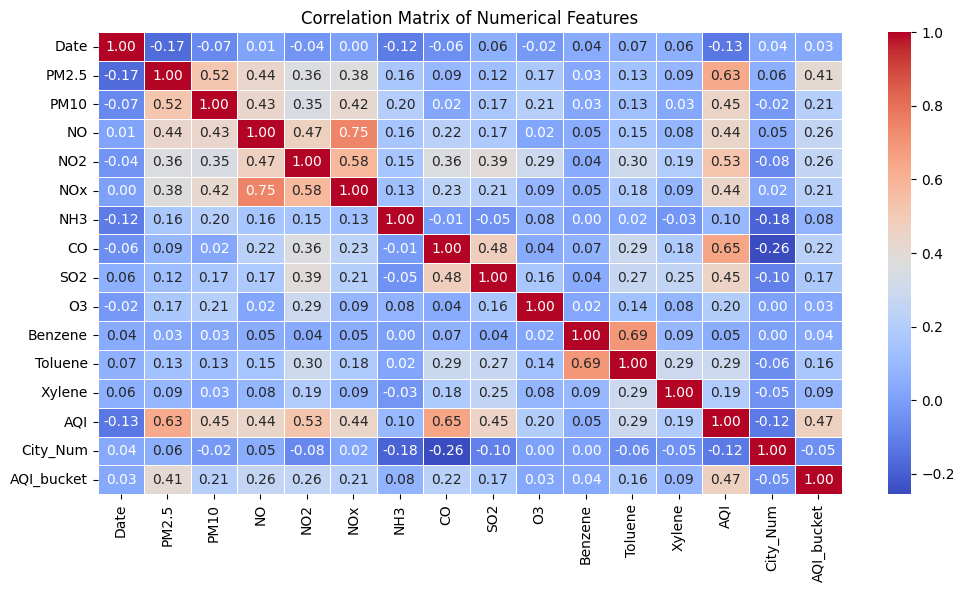

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Set up the figure
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Matrix of Numerical Features")
plt.show()


Inference: This section calculates the correlation between numerical features and visualizes it using a heatmap. This helps identify potential relationships and dependencies between features, which can be useful for feature selection or understanding the data better.

##**Model Training and Evaluation**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # Changed to Classifier
from sklearn.metrics import accuracy_score, classification_report  # Changed metrics
from sklearn.tree import DecisionTreeClassifier

# Assuming 'df' is your DataFrame and 'AQI_bucket' is your target column
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3",
            "Benzene", "Toluene", "Xylene", "City_Num"]
target = "AQI_bucket"  # Using AQI_bucket for classification

X = df[features]
y = df[target]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)  # Changed to Classifier
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation (using classification metrics)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)  # Detailed report

print(f"Model Performance:\nAccuracy: {accuracy:.2f}")
print(report)  # Print the classification report

Model Performance:
Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       237
           1       0.85      0.89      0.87      2763
           2       0.68      0.60      0.64       553
           3       0.82      0.84      0.83      1611
           4       0.86      0.77      0.81       272
           5       0.75      0.77      0.76       471

    accuracy                           0.82      5907
   macro avg       0.80      0.75      0.77      5907
weighted avg       0.82      0.82      0.82      5907



In [ ]:
m1= DecisionTreeClassifier() # Changed to Classifier
m1.fit(X_train, y_train)
y_pred = m1.predict(X_test)

# m1 Evaluation (using classification metrics)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)  # Detailed report

print(f"m1 Performance:\nAccuracy: {accuracy:.2f}")
print(report)  # Print the classification report

m1 Performance:
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       237
           1       0.81      0.82      0.81      2763
           2       0.56      0.52      0.54       553
           3       0.75      0.75      0.75      1611
           4       0.74      0.72      0.73       272
           5       0.66      0.68      0.67       471

    accuracy                           0.75      5907
   macro avg       0.69      0.69      0.69      5907
weighted avg       0.75      0.75      0.75      5907



In [ ]:
y_pred

array([1, 1, 3, ..., 1, 3, 1])

Inference: This final part involves splitting the data into training and testing sets, training a Random Forest Classifier model, making predictions on the test set, and evaluating the model's performance using metrics like accuracy and a classification report. It aims to assess how well the model can predict the 'AQI_bucket' based on the provided features.